# Linear Regression for gold price price prdiction<br>
#### Lakshya Garg<br> 211000027

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from datetime import datetime
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

### Loaded Libraries

In [2]:
custom_date_parser = lambda x: datetime.strptime(x,"%d-%m-%Y")
# Custom Parser to read date time 

In [3]:
daily=pd.read_csv('gold_daily.csv',parse_dates=['Date'],date_parser=custom_date_parser)
print(daily.dtypes)
daily

Date           datetime64[ns]
Open                   object
High                   object
Low                    object
Close*                 object
Adj Close**            object
dtype: object


,Date,Open,High,Low,Close*,Adj Close**
0,2022-12-30,"1,817.00","1,822.30","1,816.80","1,819.70","1,819.70"
1,2022-12-29,"1,805.80","1,819.50","1,805.80","1,819.50","1,819.50"
2,2022-12-28,"1,803.20","1,807.90","1,803.10","1,807.90","1,807.90"
3,2022-12-27,"1,803.40","1,826.30","1,803.40","1,814.80","1,814.80"
4,2022-12-23,"1,794.30","1,802.80","1,794.10","1,795.90","1,795.90"
5,2022-12-22,"1,818.10","1,818.10","1,785.00","1,787.00","1,787.00"
6,2022-12-21,"1,817.40","1,821.40","1,814.40","1,815.90","1,815.90"
7,2022-12-20,"1,786.50","1,821.40","1,786.50","1,815.90","1,815.90"
8,2022-12-19,"1,791.60","1,796.30","1,785.60","1,787.70","1,787.70"
9,2022-12-16,"1,777.90","1,791.40","1,777.90","1,790.00","1,790.00"


### Data Pre-processing <br>
Converting object(string) data type to float

In [4]:
for i in daily.columns:
    if i=='Date':
        continue
    else:
        daily[i]=daily[i].str.replace(',','')
        daily[i]=daily[i].astype(float)

# daily['High']=daily['High'].astype(float)
# daily['Date'].astype({'Date':int})
print(daily.dtypes)
daily

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close*                float64
Adj Close**           float64
dtype: object


,Date,Open,High,Low,Close*,Adj Close**
0,2022-12-30,1817.0,1822.3,1816.8,1819.7,1819.7
1,2022-12-29,1805.8,1819.5,1805.8,1819.5,1819.5
2,2022-12-28,1803.2,1807.9,1803.1,1807.9,1807.9
3,2022-12-27,1803.4,1826.3,1803.4,1814.8,1814.8
4,2022-12-23,1794.3,1802.8,1794.1,1795.9,1795.9
5,2022-12-22,1818.1,1818.1,1785.0,1787.0,1787.0
6,2022-12-21,1817.4,1821.4,1814.4,1815.9,1815.9
7,2022-12-20,1786.5,1821.4,1786.5,1815.9,1815.9
8,2022-12-19,1791.6,1796.3,1785.6,1787.7,1787.7
9,2022-12-16,1777.9,1791.4,1777.9,1790.0,1790.0


In [5]:
daily.sort_values('Date',ascending=True,inplace=True,ignore_index=True)
daily

,Date,Open,High,Low,Close*,Adj Close**
0,2022-12-01,1768.7,1803.7,1768.7,1801.1,1801.1
1,2022-12-02,1802.0,1802.3,1779.4,1795.9,1795.9
2,2022-12-05,1795.7,1808.0,1764.3,1767.4,1767.4
3,2022-12-06,1768.6,1779.4,1767.9,1769.3,1769.3
4,2022-12-07,1769.3,1790.3,1769.3,1785.5,1785.5
5,2022-12-08,1782.0,1790.9,1782.0,1788.7,1788.7
6,2022-12-09,1794.9,1804.3,1791.1,1798.1,1798.1
7,2022-12-12,1787.3,1793.9,1777.7,1780.5,1780.5
8,2022-12-13,1780.7,1819.8,1780.5,1813.9,1813.9
9,2022-12-14,1810.8,1812.8,1797.9,1807.5,1807.5


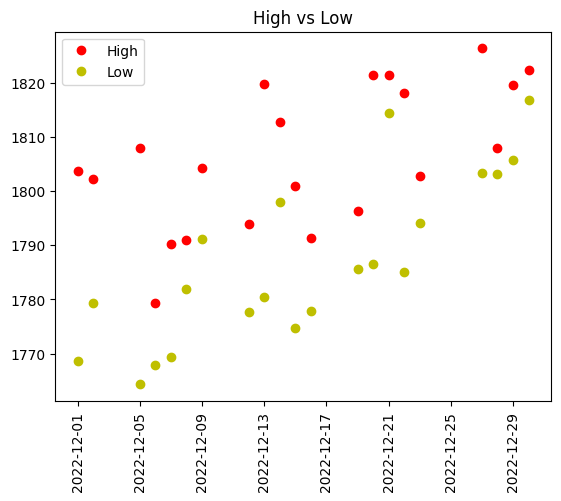

In [6]:
plt.plot(daily['Date'],daily['High'],'ro',label='High')
plt.plot(daily['Date'],daily['Low'],'yo',label='Low')
plt.xticks(rotation=90)
plt.title('High vs Low')
plt.legend(['High','Low'])
plt.show()


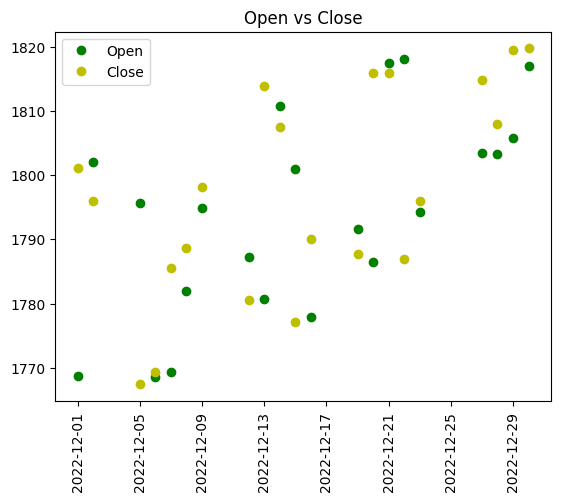

In [7]:
plt.plot(daily['Date'],daily['Open'],'go')
plt.plot(daily['Date'],daily['Close*'],'yo')
plt.xticks(rotation=90)
plt.title('Open vs Close')
plt.legend(['Open','Close'])
plt.show()

In [8]:
class LR:
    
    
    def __init__(self):
        pass    
        
    
    def fit_GD(self,X_train,y_train,epochs,alpha):
        cost_history=[]
        self.weights=np.ones(X_train.shape[1])
        new_weights=np.zeros(X_train.shape[1])
        self.bias=np.random.randint(np.min(y_train),np.max(y_train))
        for k in range(epochs):
            cost_history.append(self.MSE(y_train,self.predict(X_train)))
            # for i in range(X_train.shape[0]):
            new_weights=np.average((np.matmul(X_train,self.weights)+self.bias-y_train)*self.weights)
            # for i in range(X_train.shape[0]):
            new_bias=np.average((np.matmul(X_train,self.weights)+self.bias-y_train))

                
            # for j in range(X_train.shape[1]):
            self.weights-=(new_weights*alpha)
                # updating weights
            self.bias-=(alpha*new_bias)
                # updating bias
        cost_history.append(self.MSE(y_train,self.predict(X_train)))
        return cost_history


    def fit_direct(self,X_train,y_train):
        X_train_orig=X_train
        X_train=np.hstack((X_train,np.ones((X_train.shape[0],1))))
        self.weights=np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.bias=self.weights[-1]
        self.weights=self.weights[0:-1]
        return self.MSE(y_train,self.predict(X_train_orig))


    
    def predict(self,X_test):
        return np.matmul(X_test,self.weights)+self.bias
        
    
    def MSE(self,y_true,y_pred):
        a=y_true-y_pred
        return np.sum(a**2)/a.shape[0]
    # function for Mean Square Error Calculation 
    # It involves no loops it is faster (vectorized)
    


In [16]:
X_train=pd.DataFrame()
temp=[]
for index,i in enumerate(daily['Date']):
    temp.append(index)

X_train['Date']=pd.DataFrame(temp)
y_train=daily['High']
X_train.shape[0]
# y_train
# model.MSE(np.array([2.3,8.9]),np.array([9,8]))

21

In [37]:
model_implemented=LR()
graph_GD=model_implemented.fit_GD(X_train,y_train,  15,0.003)
model_scikit=linear_model.LinearRegression() #Implemented Linear Regression
model_scikit.fit(X_train,y_train) #Direct Computation using matrix inversion

LinearRegression()

In [48]:
y_pred_implemented=model_implemented.predict(X_train)
y_pred_scikit=model_scikit.predict(X_train)
print(model_implemented.weights,"Weight/s by GD")
print(model_implemented.bias,"Bias by GD")



[1.24909091] Weight/s by GD
1793.8805194805198 Bias by GD


In [39]:
print(model_implemented.MSE(y_train,y_pred_implemented))
print(mean_squared_error(y_train,y_pred_scikit))
print("Comparing MSE from scikit-direct weights calculation vs GD implemented")

119.85246421618521
105.40986765615294
Comparing MSE from scikit-direct weights calculation vs GD implemented


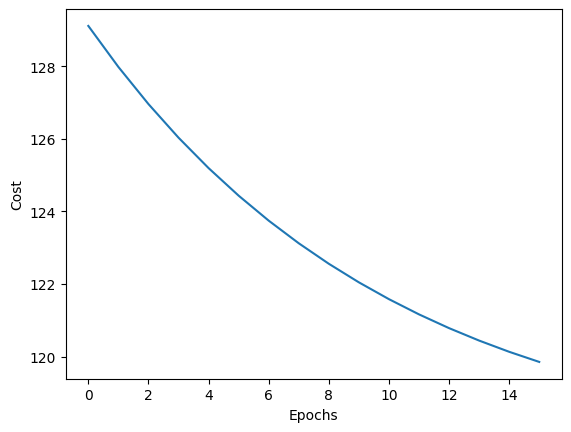

In [40]:
plt.plot(graph_GD)
plt.xlabel('Epochs')
plt.ylabel("Cost")
plt.show()

In [45]:
print(model_implemented.fit_direct(X_train,y_train))
print(mean_squared_error(y_train,y_pred_scikit))
print("MSE same by direct method for my implementation and scikit both")

105.40986765615249
105.40986765615294
MSE same by direct method for my implementation and scikit both


In [51]:
print("Prediction for Next Day")
model_implemented.predict([X_train.shape[0]+1])

Prediction for Next Day


1821.3605194805205